# An Introduction to Social Data Science

## Lecture Four

### An Introduction to Machine Learning: Part One

#### 12th August, 2021

### 4.0 Introduction

We'll cover all of the basics, give two examples, then set a homework which may or may not come with a prize!

    4.0 Introduction
    4.1 Key Concepts
    4.1.1 The general form of the problem.
    4.1.2 Conceptual differences between inference and prediction.
    4.1.3 Various types of prediction problem (and why we care).
    4.1.4 Fundamentals of feature engineering.
    4.1.5 Fundamentals of cross validation.
    4.2. Simple example of asupervised regression problem (predicting house prices).
    4.3.0 Moving to more advanced models
    4.3.1 Linear Model Selection and Regularization.
    4.3.2 An introduction to tree based methods.
    4.3.3 An introduction to support vector machines.
    4.4. Concluding thoughts, and things we didn't cover
    4.5. Homework: A supervised classification (whether a person survives the titanic).

Note, in general, there is going to be a lot more markdown in this lecture than code (as opposed to the last class, which was mostly code). This is because we are going to introduce methodological _concepts_ rather than how they are applied.

There are two books which I would recommend extremly highly:

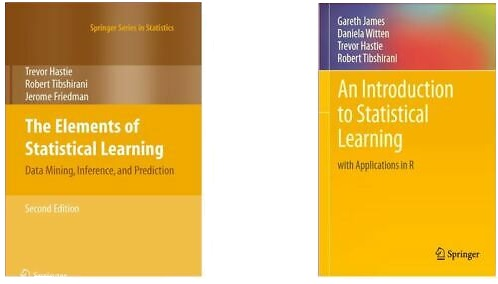

In [1]:
from IPython.display import Image
Image(filename='figures/textbooks.jpg')

Left ("ISLR") is an introduction to applied statistical learning ('Anyone who wants to intelligently analyze complex data should own this book'). This lecture closely follows Chapters 1-6, 8 and 9. 15 hours of [lectures](https://www.r-bloggers.com/2014/09/in-depth-introduction-to-machine-learning-in-15-hours-of-expert-videos/)/full [e-book](https://www.statlearning.com/) available for free! Right (`ESL') is a more advanced introduction to the technical aspects of statistical learning for students with a technical background.

### 4.1 Key Concepts

But wait; those textbooks are about _statistical_ learning, not _machine_ learning; what's the differenece?

```
When you go to a party and
Someone says, `What do you do?'
When you say, `I'm a statistician',
They run for the door.
But nowadays, we can say, well,
`We do machine learning.'
And they still run for the door,
but just take longer to get there.```

* The Boundaries between ML and SL increasingly blurred!
    * Machine Learning: greater emphasis on large scale applications and predictive accuracy.
    * Statistical Learning: greater emphasis on models, interpret-ability, precision and uncertainty.

| Machine Learning (ML) | Statistical Learning (SL) |
| --- | --- |
| weights | parameters |
| supervised learning | classification, regression |
| unsupervised learning | clustering |
| large grant = $1m | large grant = $50k |
| learning | fitting |

#### 4.1.1 The General Form

Suppose a quantitative response $Y$ and $p$ different predictors, $X_1$, $X_2$, ... $X_p$.

Assume some relationship between $Y$ and $X$ = ($X_1$, $X_2$, ..., $X_p$):

$Y$ = $f$($X$) + $\varepsilon$

Where $f$ is some fixed but unknown function.

$\varepsilon$ is a random error term.

Statistical/Machine Learning refers to a set of approaches for estimating $f$.

Consider two classic social science examples:

    1.  Regression: modeling years of education and income.
    2.  Classification: predicting whether somebody will default on their loan.

We're likely all familiar with basic multivariate linear regression form:

$Y_i$ = $\beta_0$ + $\beta_1$$X_1$ + $\beta_2$$X_2$ +... + $\varepsilon$

Possibly in linear-log form, possibly with some polynomials:

$Y_i$ = $\beta_0$ + $\beta_1$ln($X_1$) + $\beta_2$$X_2^2$ + ... + $\varepsilon$

However, **the world is not flat**.

Note, in general, we aren't generally considering the value of $\beta_1$ in something like $\beta_1$$X_1$, we're now considering $\hat{Y_i}$. How does this look in our single bivariate regression context? Where, for example, is $Y_5$, and where is $\hat{Y_5}$ on the plot below? How about $\beta_1$?

Text(0, 0.5, 'Y')

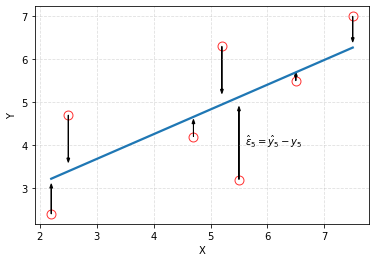

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
x=[2.2,2.5,5.5,6.5,7.5,4.7,5.2]
y=[2.4,4.7,3.2,5.5,7,4.2,6.3]
ax = plt.axes()
sns.regplot(x=x,y=y,ci=None, ax=ax,
            scatter_kws={'s':80, 'edgecolor':'r', 'color':'w'},)
for point, tip in zip(range(0, 7), [.6, -1, 1.6, .1, -.5, .3, -1]):
    ax.arrow(x[point], y[point], 0, tip, head_width=0.05,
             head_length=0.1, fc='k', ec='k', linewidth=1)
ax.annotate(r'$\hat{\varepsilon}_5 = \hat{y}_5 - y_5$',
            xy=(5.6, 4), xytext=(5.6, 4))
plt.grid(True, linestyle='--', alpha=0.4)
plt.xlabel(r'X')
plt.ylabel(r'Y')

In the general functional form:

$\hat{f}$ represents our estimate for $f$, \hat{Y}$ the prediction of $Y$:

$\hat{Y}$ = $\hat{f}$($X$)

In lots of Deep Learning, $\hat{f}$ is often treated as a black box (with no real concern for form).

The accuracy of $\hat{Y}$ depends on _reducible_ and _irreducible_ error.

As $\hat{f}$ will not (usually) be a perfect estimate for of the data generating process, we can term this reducible error: error that we can reduce with a better $\hat{f}$

Even if it were possible to form a perfect estimate ($\hat{Y}$ = $f$($X$)), we would still have some error, perhaps a function of unobserved variables/mis-measurement):

E($Y$ - $\hat{Y}$)$^2$ = E[$f$($X$) - $\hat{f}$($X$)]$^2$

E($Y$ - $\hat{Y}$)$^2$ = E[$f$($X$) - $\hat{f}$($X$)]$^2$ + Var($\varepsilon$)

Reducible error is that which we can eliminate, irreducible error is that which we can't.

#### 4.1.2 Conceptual differences between inference and prediction.

Traditionally, we've been interested in estimating $f$ to address *inferential* questions. This relates to making statements like '$X_1$ is statistically associated with $Y$', and you might have heard this termed as a "beta hat" problem.

 - This is about the way Y is affcted as $X_1$, ... , $X_p$ change.
 - In this inferential case, $f$ cannot be treated as a black box, because we need to know its exact form.
 - We might be interested in, for example:
    1. Which predictors are associated with the response?
    2. What is the relationship between the response and each predictor?
    3. Can we summarize with a linear equation, or is it more complicated?
 - Depending on whether our goal is prediction, inference, or both, different methods for estimating f may be appropriate:
    1.  Linear models allow for relatively simple interpretation, but predict poorly.
    2.  Highly non-linear approaches often predict well, but are less interpret-able.
 - Note: there is a lot of ongoing work (some of which I'm working on myself) about making non-linear machine learning based methods more interpretable.
 - We're set to focus on prediction for the remainder of this class.

So, why do we we care about prediction, otherwise known as "y hat" problems?

 - Increasing computational power, infinite data pipelines and algorithmic advances force us to reconsider what's possible.
 - `Future of mankind is reformulating existing challenges as prediction problems'.
 - Where does prediction impact our lives?:
    1. Naive Bayes classifiers: protect your emails from spam.
    2. Recommender Systems: what to watch (Netflix) or buy (Amazon)
    3. Deep Convolutional Neural Networks: facial recognition (Facebook).
    4. Recurrent Neural Network: Speech recognition (Siri, Alexa, etc).
    5. Reinforcement learning: AlphaGo teaches itself how to win without data.

Can you think of _any_ other popular or commonplace algorithms which affect our dailyt lives?

#### 4.1.3 Various types of prediction problem (and why we care).

There are two main types of machine learning problems: supervised and unsupervised:
    1. Supervised problems: make predictions based on a set of examples (training data).

We can further split supervised problems into two categories:

        1.1 Classification: predict which category something falls into (a discrete set of values). Examples include: Naive Bayes, Supper Vector Machines, Logistic Regressions, Neural Networks.

        1.2 Regression: make a prediction on a continuous scale. Examples could be predicting the stock price of a company or predicting the temperature tomorrow. Examples of techniques include OLS, Nonlinear Regression and Bayesian Linear Regression.

    2. Unsupervised problems: where our data does not have a defined set of categories, but instead we are looking for the machine learning algorithms to help us organize the data (i.e. to look for hidden features and cluster it  way that makes sense). Examples: K-means clustering, Neural Networks, Principal component analysis.

 Lets now look at examples of each of these three in turn!

#### 4.1.3.1. A Simulated Binary Classification Example

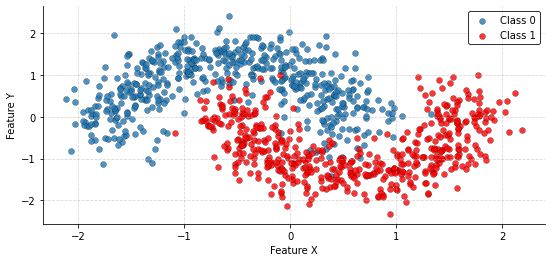

In [3]:
import  theano
from sklearn.datasets import make_moons
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
floatX = theano.config.floatX
X, Y = make_moons(noise=0.2, random_state=0, n_samples=1000)
X = scale(X)
X = X.astype(floatX)
Y = Y.astype(floatX)
fig, ax = plt.subplots(figsize=(9,4))
ax.scatter(X[Y==0, 0], X[Y==0, 1], label='Class 0', edgecolor='k',
           linewidth=0.25, alpha=0.8)
ax.scatter(X[Y==1, 0], X[Y==1, 1], color='r', label='Class 1',
           edgecolor='k', linewidth=0.25, alpha=0.8)
ax.grid(alpha=0.5, linestyle='--')
sns.despine();
ax.legend(edgecolor='k', frameon=True)
ax.set(xlabel='Feature X', ylabel='Feature Y');

The objective: given X and Y, can we create a model which predicts Class 1 or 0? Binary classification is conceptually/analytically/computationally simpler than multi-class classification. You've most likely seen problems like this before as logistic regressions. Objective: given a new observation here, can we predict whether it should be of Class 0, or Class 1?

#### 4.1.3.2. A Classic (Multi-Class) Classification Example

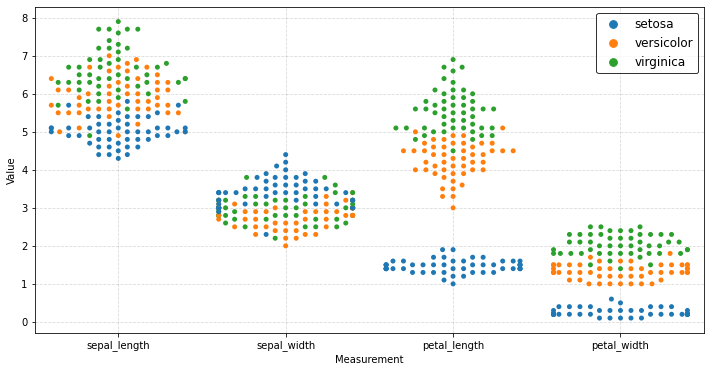

In [4]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
iris = sns.load_dataset("iris")
iris = pd.melt(iris, "species", var_name="measurement")
ax = sns.swarmplot(x="measurement", y="value",
                   hue="species", data=iris, edgecolor='k', s=5)
ax.legend(loc='upper right', frameon=True, edgecolor='k', fontsize=12)
ax.grid(b=True, which='major', color='k', linestyle='--', alpha=0.15)
ax.set_ylabel('Value')
ax.set_xlabel('Measurement')
fig = plt.gcf()
fig.set_size_inches(12, 6)

This example comes from a dataset accompanying the extremely famous paper by R.A. Fisher (1936): `The Use of Multiple Measurements in Taxonomic Problems'. It comes bundled with the `seaborn` library (and many others, indeed, it's a very commonly used dataset for teaching and prototyping code). It contains 50 samples from each of Iris setosa, Iris virginica and Iris versicolor; different species of the [Iris](https://en.wikipedia.org/wiki/Iris_(plant)) flowering plant. It contains four features which are measured: length and width of sepals and petals (in cm). Objective: if we measure a new plant, can we accurately predict the species?

#### 4.1.3.3. A Less Classic Regression Example

As mentioned above, the objective of regression is to predict continuous variables. Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table
locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the United States) are a major component of pay.
In one restaurant, a food server recorded the following data on all customers they served during an interval of two and a half months in early 1990. The restaurant, located in a suburban shopping mall, was part of a national
chain and served a varied menu. In observance of local law, the restaurant offered to seat in a non-smoking section to patrons who requested it. Each record includes a day and time, and taken together, they show the server’s
work schedule.

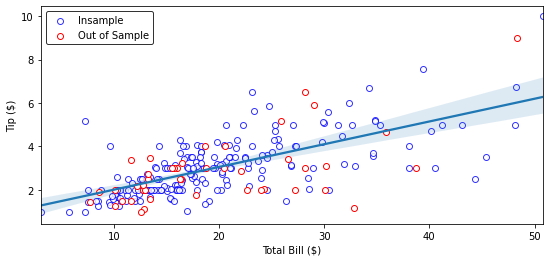

In [5]:
tips = sns.load_dataset("tips")
ax = sns.regplot(x="total_bill", y="tip", data=tips[0:200],
                 scatter_kws={'edgecolor':'b', 'color':'w'}, label='Insample')
ax.set_xlabel('Total Bill ($)')
ax.set_ylabel('Tip ($)')
ax1 = plt.scatter(x=tips[200:]["total_bill"], y = tips[200:]['tip'],
                  edgecolor='r', color='w', label='Out of Sample')
ax.legend(frameon=True, edgecolor='k')
fig = plt.gcf()
fig.set_size_inches(9, 4)

Blue dots are part of the training set, the red are the test set (more shortly). Given data on the total bill, can we predict how much somebody will tip?

#### 4.1.3.4 An Unsupervised Learning Example

We generally are less concerned with unsupervised learning examples in Social Science. The broad idea is that an algorithm decides on specific clusters and categories: there is no external classification or supervised training set for us to train our data on. The most famous algorithm of this kind is called `k-means clustering'.

The example below is a density-based spatial clustering of applications with noise (DBSCAN). A much more familiar example would be the Latent Dirichlet allocation of topics in a (series of) document(s). More on this in the coming lectures!

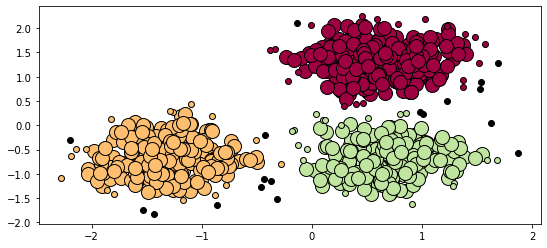

In [6]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750,
                            centers=centers, cluster_std=0.4,
                            random_state=0)
X = StandardScaler().fit_transform(X)
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
fig = plt.gcf()
fig.set_size_inches(9, 4)

#### 4.1.3.5 Exercise, and a ten minute break.

I'm now going to set you some questions to think about, while we take a break and get a glass of water.

**Class Quiz 1**: Which is inference, which is prediction?

1.a
* Given the age of a passenger, did they survive the titanic?
* What is the effect of gender on surviving the titanic?

1.b
* How does the local crime rate change house prices?
* Given a set of variables, what will a specific house sell for?

1.c
* How does an additional pound of income affect the probability of default?
* Will a specifc loan applicant default on their loan?

1.d
* Will Oxford United F.C. win the first game of the new season?
* Is a team more likely to win if they shoot towards their own fans in the 2nd half?

**Class Quiz 2:** Which is classification, which is regression?

2.a: We collect a set of data on the top 500 firms listed on a stock exchange. For each firm, we record data on profit, number of employees, the industry class, and CEO salary. We are interested in predicting CEO salary.

2.b:  We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other
variables.

2c: We are interested in predicting the % change in the USD/Euro exchange rate in relation to the weekly changes in the world stock markets Hence we collect weekly data for all of 2012. For each week we record the % change in the USD/Euro, the % change in the US market, the % change in the British market, and the % change in the German market. We are interested in both i.) whether the USD (£) will have increased against the GBP (£) in 365 days time, and ii.) by how much the USD (£) will have increased against the GDP (£).

#### 4.1.4 Fundamentals of feature engineering.

The question of how to best represent our data is known as `feature engineering'.

It can have a critical in infuence on the performance of prediction.

Latterly (to be discussed): the `model selection' stage determines which features to actually include, depending on the algorithms that we think are most important for our research design.

#### 4.1.4.1 Categorical variables

We've already seen categorical variables in our `pandas` introduction. Think of something basic, like colours, for example:

| Color | red | green | blue | yellow |
| --- | --- | --- | --- | --- |
red | 1 |  0 |  0 |  0 |
green | 0 | 1 | 0 | 0 |
red | 1 | 0 | 0 | 0 |
yellow | 0 | 0 | 0 | 1 |


This example may be thought of as quite trivial, but do note that many survey datasets include categorical encoded using integers, where -- as in the FFC example -- things like `-9` represent non-response. A common example from social science datasets? martial status.

#### 4.1.4.2. Binning (or 'Discretization'):

Binning continuous data and using one-hot can often improve performance.

Example: Bin ages into deciles, then one-hot encode into a bunch of dummies.

In [7]:
import random
df = pd.DataFrame(columns=['Age'])
df['Age'] = x = [random.randint(1, 100) for p in range(0, 1000)]
df['IsChild'] = np.where(df['Age']<18, 1, 0)
df[0:10]

,Age,IsChild
0,73,0
1,21,0
2,76,0
3,36,0
4,50,0
5,65,0
6,59,0
7,62,0
8,79,0
9,24,0


#### 4.1.4.3. Interactions and Polynomials:

Often used in statistical modeling, but also useful in machine learning. Polynomials can substantially increase performance and reduce under-fitting. For example:

$Y_i$ = $\beta_0$ + $\beta_1$$X_1$

transforms to the quadratic:

$Y_i$ = $\beta_0$ + $\beta_1$$X_1$ + $\beta_2$$X_1^2$

which is can still be estimated with OLS. We can also remove the additive assumption:

$Y_i$ = $\beta_0$ + $\beta_1X_1$ + $\beta_2$ $X_1$$X_2$

#### 4.1.4.4 Uni-variate Non-linear transformations:

Functions like log and exp help by adjusting relative scales of the data so they can be better modelled using linear regression or neural networks. Most models work best when each feature is loosely Gaussian: log and exp are a hacky but effective way to achieve this (to deal with non-constant variance).

#### 4.1.5 Fundamentals of cross validation.


Until now, we haven't adequately discussed training and test sample splits (although they did feature to some extent in our `seaborn-tips` example). If we go back to that figure, we can see that some dots are red, and some are blue. 'In-sample' prediction is an unrealistic representation of a typical forecasting exercise in practice: it gives the model data which is then use to create the predictions which itself generates. A lot of social science literature in days gone by has conflated the term 'predicts' to mean 'is statistically associated with'.

Typically, we need to split our data into two (or three) partitions:
1. Training: fit the data to the model.
2. (Optional) Grid-search: tune hyper-parameters associated with model.
3. Test: how well does this model (and specifically trained parameter set) apply to unseen observations?

This is the essense of `out-of-sample' forecasting or the `cross-validation' of the model (the example above is technically a `one-fold` split). This leads us to `k-fold' cross-validation.

Randomly splitting into a train and test sample set is not the most robust solution. It might provide a disproportionately easy test set. `k-fold` cross-validation involves partitioning the data into k folds....


The model is first trained on all but one of the folds, and tested on the remainder. We then cycle through all the folds in this way. For example: 5-fold cross-validation involves training on fold 1-4, and then testing on fold 5. We then train on folds 1,2,3 and 5, test on 4, and so on. This gives us `k` test sub-samples to evaluate the stability of our model across (i.e. analyze the spread, mean of evaluation metrics): but computationally costly.
Stratified k-fold cross-validation ensures an even split of case/controls in each fold.

Leave-one-out cross-validation (a specific example of k-fold, where k=n-1) trains on all data apart from one observation, testing on the one.

For many algorithms, we need a third split for tuning parameters.

Lets now begin to think about how we can evaluate our models. First of all, lets consider binary evaluations.

Using simple accuracy may not be advisable due to:

    1. Different types of errors not having symmetrical effect (e.g. FP vs TN).
    2. Unbalanced datasets (i.e. a many controls, few cases { e.g. click-through).

Solution: the confusion matrix, summarized with precision, recall and f-scores:

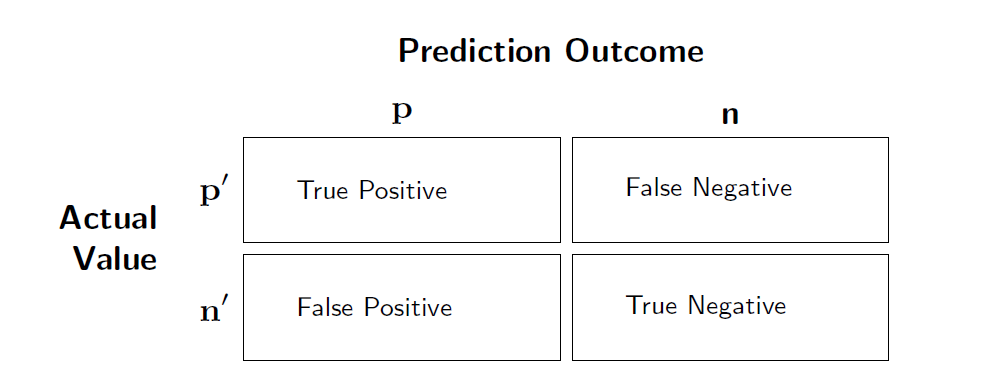

In [8]:
Image(filename='figures/evaluation.png')

Precision = $\frac{TP}{TP+FP}$

Recall = $\frac{TP}{TP+FN}$

F = 2 $\times$ $\frac{pecision \times recall}{precision+recall}$

Other common metrics include the Receiver Operating Characteristics (ROC) curve (FP rate vs TP rate) and the Area Under the [ROC] Curve (AUC), none of which we will really talk abut in detail here.

Multi-class evaluation for categorical problems expands naturally from the binary classification problem. For example, we could have a 10 $\times$% 10 confusion matrix, with adjustments to f-score/other summaries.

Regression problems need other metrics which measure the continuous distance from what was observed, such as the mean squared error:

$MSE = \frac{1}{n}\sum_{i=1}^n (Y_i - \hat{Y_i})^2$

or the mean absolute error (depending on how we want to penalize the distance):

$MAE = \frac{1}{n}\sum_{i=1}^n (|Y_i - \hat{Y_i}|)$

Implementations (e.g. scikitlearn) typically offer a *lot* of different types of `loss functions', such as the ones discussed above.

We can show expected test MSE can always be decomposed into the 3 quantities:

$E(y0 - \hat{f}(x_0))^2 = Var(\hat{f}(x_0)) + [Bias(\hat{f}(x_0))]^2 + Var(\varepsilon)$

Here, $E(y0 - \hat{f}(x_0))^2$ defines the expected test MSE. Note: expected test MSE can never lie below $Var(\varepsilon)$ (the irreducible error). Variance refers to the amount by which $\hat{f}$ changes if estimated with a different training data set. The bias term refers to the error that is introduced by approximating a real-life problem. Generally, as we use more flexible methods, the variance increases, and the bias decreases.
The Relative tradeoff between variance and bias determines whether test MSE goes up or down.

### 4.2. Simple example of asupervised regression problem (predicting house prices).

Lets now take a break and set a class exercise. Here, I'm going to ask you to use the 'Boston Housing Dataset' found in the `lecture_4/data/` subdirectory. This contains information on house prices (and related features) in Boston. The original dataset had 14 variables in it:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* LSTAT - % lower status of the population
* MEDV - a numeric vector of median values of owner-occupied housing in USD 1000
* CMEDV - a numeric vector of corrected median values of owner-occupied housing in USD 1000

This ammended and updated ('Corrected') version of the dataset contains 3 new variables:

* LAT - The latitude of the centroid of the census tract
* LON - The longitude of the centroid of the census tract
* TOWN - A factor with levels given by town names

The exercise is as follows:

1. Load the dataset into a pandas dataframe (with relative or absolute paths).
2. Examine the first 5 rows of the dataframe with .head(5)
3. Subset for only the columns we're going to use for building our model: `RM`, `LSTAT`, `PTRATIO`, `CMEDV`.
4. Do some quick and very basic Exploratory Data Visualisation ('EDA')
5. Engineer one of the features, called 'PTRATIO'. Make new binary variables for whether the PTRATIO is 'low' (under 16), 'medium' (between 16 and 20, inclusive), and 'high' (over 20).
6. Using something like `from sklearn.model_selection import train_test_split` or otherwise manually splitting the data, split the data into four partitions: training and test splits for 'X' (features) and 'y' (the variable to be predicted, which can be either `MEDV` or `CMEDV`)
7. Calculate some basic descriptive stratistics for your train and test splits. We'll see an example of this in the next lecture.
8. Define a simple linear model (using `from sklearn import linear_model` or otherwise) which first uses the features `RM`,`LSTAT`,`PTRATIO`, and then one which replaces `PTRATIO` with your binned variables.
9. Using `from sklearn.metrics import mean_squared_error` or otherwise: how does the MSE compare?
10. [Optional if time]: The above is a simple `1-fold` Cross-Validation. Extend this (in a loop) to 25, 50 or even 100 folds.

### 4.3.0 Moving to more advanced models

Lets now move to more advanced models.

### 4.3.1 Linear Model Selection and Regularization.

The main type of extension beyond simple linear models are 'subset selection' types of algorithms.

#### 4.3.1.1 Subset Selection: Best Subset Selection

One way to increase predictive accuracy is to undertake subset selection. Identify a subset of $p$ predictors related to $Y$ (then fit with least squares).

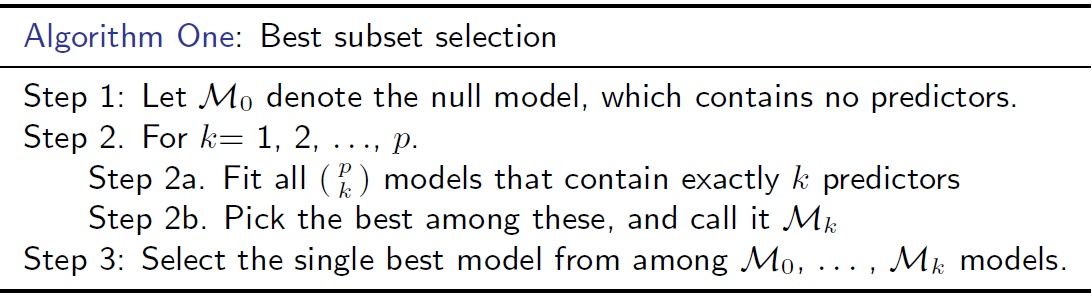

In [9]:
Image(filename='figures/algorithm_1.png')

The objective is to select the "best" model from the $2p$ predictors. We then get a set of $p+1$ models, which we can easily choose between. However, this is an extremely computationally demanding procedure. When $p=20$, there are over a million models to estimate....

#### 4.3.1.2 Subset Selection: Forward Selection

The best subset selection algorithm is often computationally infeasible. The "best" model might not be parsimonious if $p$ is large.

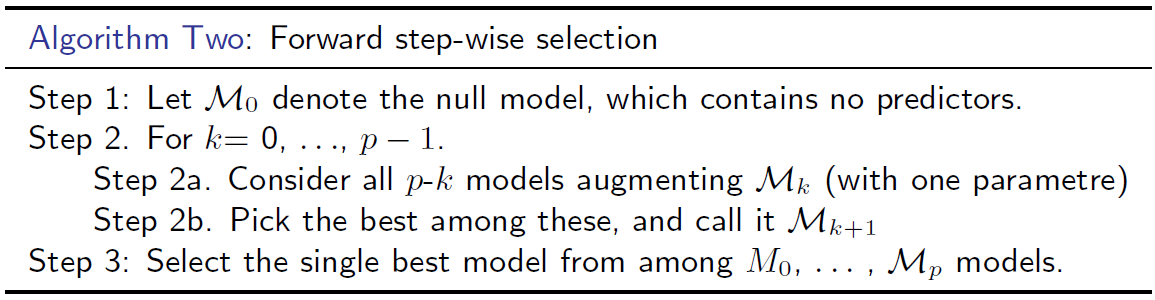

In [10]:
Image(filename='figures/algorithm_2.png')

When $p=20$, we need to estimate 1,048,576 models for best subset selection... But with forward step-wise selection, we only need to fit 211! However, this alogrithm is not guaranteed to find the best model (in the superset).

#### 4.3.1.3 Subset Selection: Forward Selection

An analogous strategy is "Backward Selection". It begins with the full least squares model containing all $p$ predictors, and then removes one at a time.

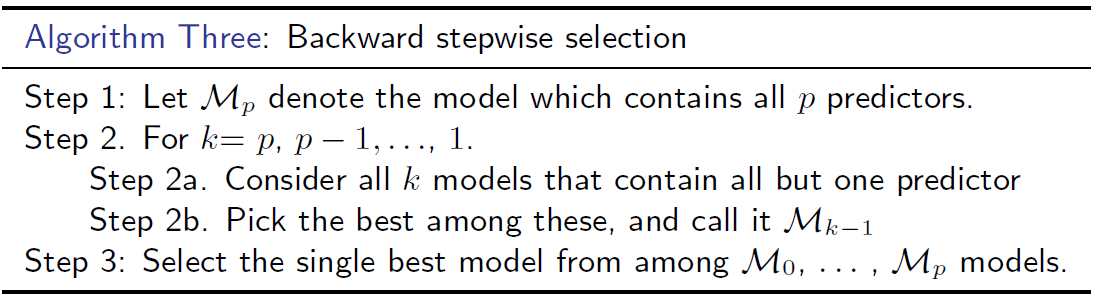

In [11]:
Image(filename='figures/algorithm_3.png')

Like Forward Selection, we only need to estimate $\frac{1+p(p+1)}{2}$ models. Unlike Forward Selection, we cannot apply it when $n$ $<$ $p$. However, what is the "Best" Model in this context? That is to say, how do we assess what represents the best model at each step? Each metric below has different properties, and can result in a different model. Note: adding variables causes $RSS$ and $R^2$ to monotonically increase with $k$...

**Method One**: Metric based.

$C_p = \frac{1}{n}(RSS + 2d\hat{\sigma}^2)$

$AIC = \frac{1}{n\hat{\sigma}^2}(RSS + 2d\hat{\sigma}^2)$

$BIC = \frac{1}{n\hat{\sigma}^2}(RSS + log(n)\hat{\sigma}^2)$

$R^2 = 1-\frac{RSS/(n-d-1)}{TSS/(n-1)}$

**Method Two**: Cross Validation Based

The general idea is that we run and estimate our models, calculate our evaluation metrics, and minimize our loss function based on this. More feasible now that available computational power has increased.

#### 4.3.1.4 Shrinkage: Ridge Regressions

Begin by recalling the least squares fitting procedure, which is to minimize:

$RSS =  \sum_{i=1}^n (y_i - \beta_0 - \sum_{j=1}^p \beta_j x_{i, j})^2$

Ridge regression coecient estimates ($\beta_j^R$) are those which minimize:

$\sum_{i=1}^n (y_i - \beta_0 \sum_{j=1}^p \beta_j x_{i, j})^2 + \lambda \sum_{j=1}^p \beta_j^2 = RSS + \lambda \sum_{j=1}^p \beta_j^2$

The aptly named shrinkage penalty shrinks estimates of $\beta_j$ towards zero. The tuning parameter ($\lambda$: determined through CV) controls the relative impact. Note: we are not shrinking the intercept ($\hat{\beta_0}$)
Note: We are no longer in a scale equivalent world! Standardization required. Ridge regressions outperform when LS estimates are highly variable (i.e. large $\frac{p}{n}$

#### 4.3.1.5: Shrinkage: The Lasso

However, none of $\beta_j^R$ are set to zero: large models remain uninterperable. The LASSO takes care of this by forcing some of the beta coefficients to zero.

$\sum_{i=1}^n (y_i - \beta_0 \sum_{j=1}^p \beta_j x_{i, j})^2 + \lambda \sum_{j=1}^p | \beta_j | = RSS + \lambda \sum_{j=1}^p \beta_j^2$

This is essentially a form of variable selection. The result is sparser models than ridge regressions, and this subsequently makes the models easier to interpret. When $\lambda$ = 0, then the model is exactly equivalent to least squares. When $\lambda$ becomes suciently large, we are left with the null model. In contrast, ridge regression will always include all variables. $\lambda$ is typically be determined through a C.V. based grid procedure.

#### 4.3.1.6: Shrinkage: The Lasso

Dimension reduction transforms predictors then uses them to fit models.

Let $Z_1$, $Z_2$, ..., $Z_M$ represent $M < p$ linear combinations of $p$ predictors.

1. Transform the predictors:

$Z_m = \sum_{j=1}^p \phi_{j, m} X_j$

2. Fit the linear model:

$Y_i = \theta_0 + \sum_{j=1}^p \theta_m z_{i, m} + \varepsilon_i$

The dimension of the problem has been reduced from $p+1$ to $M+1$.

Depending on how we choose $\phi_{1, m}$, ..., $\phi_{p, m}$  we can often outperform LS.

4.3.2 An introduction to tree based methods.

Tree-based methods involve stratifying/segmenting the predictor space. Combining many trees will often lead to improvements in prediction accuracy.

The 'internal nodes' which join the leaves are{naturally{called branches. The prediction is the mean of the response for training observations in that region. Considering all partitions is computationally infeasible: use a top-down, greedy approach: recursive binary splitting.

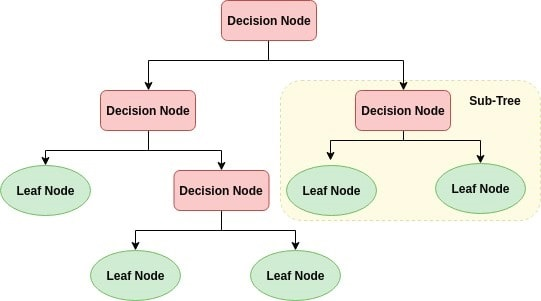

In [12]:
Image(filename='figures/decision_tree.jpeg')

Lets see an example of a Decision Tree:

In [13]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("data/pima-indians-diabetes.csv", header=None, names=col_names)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [15]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.696969696969697


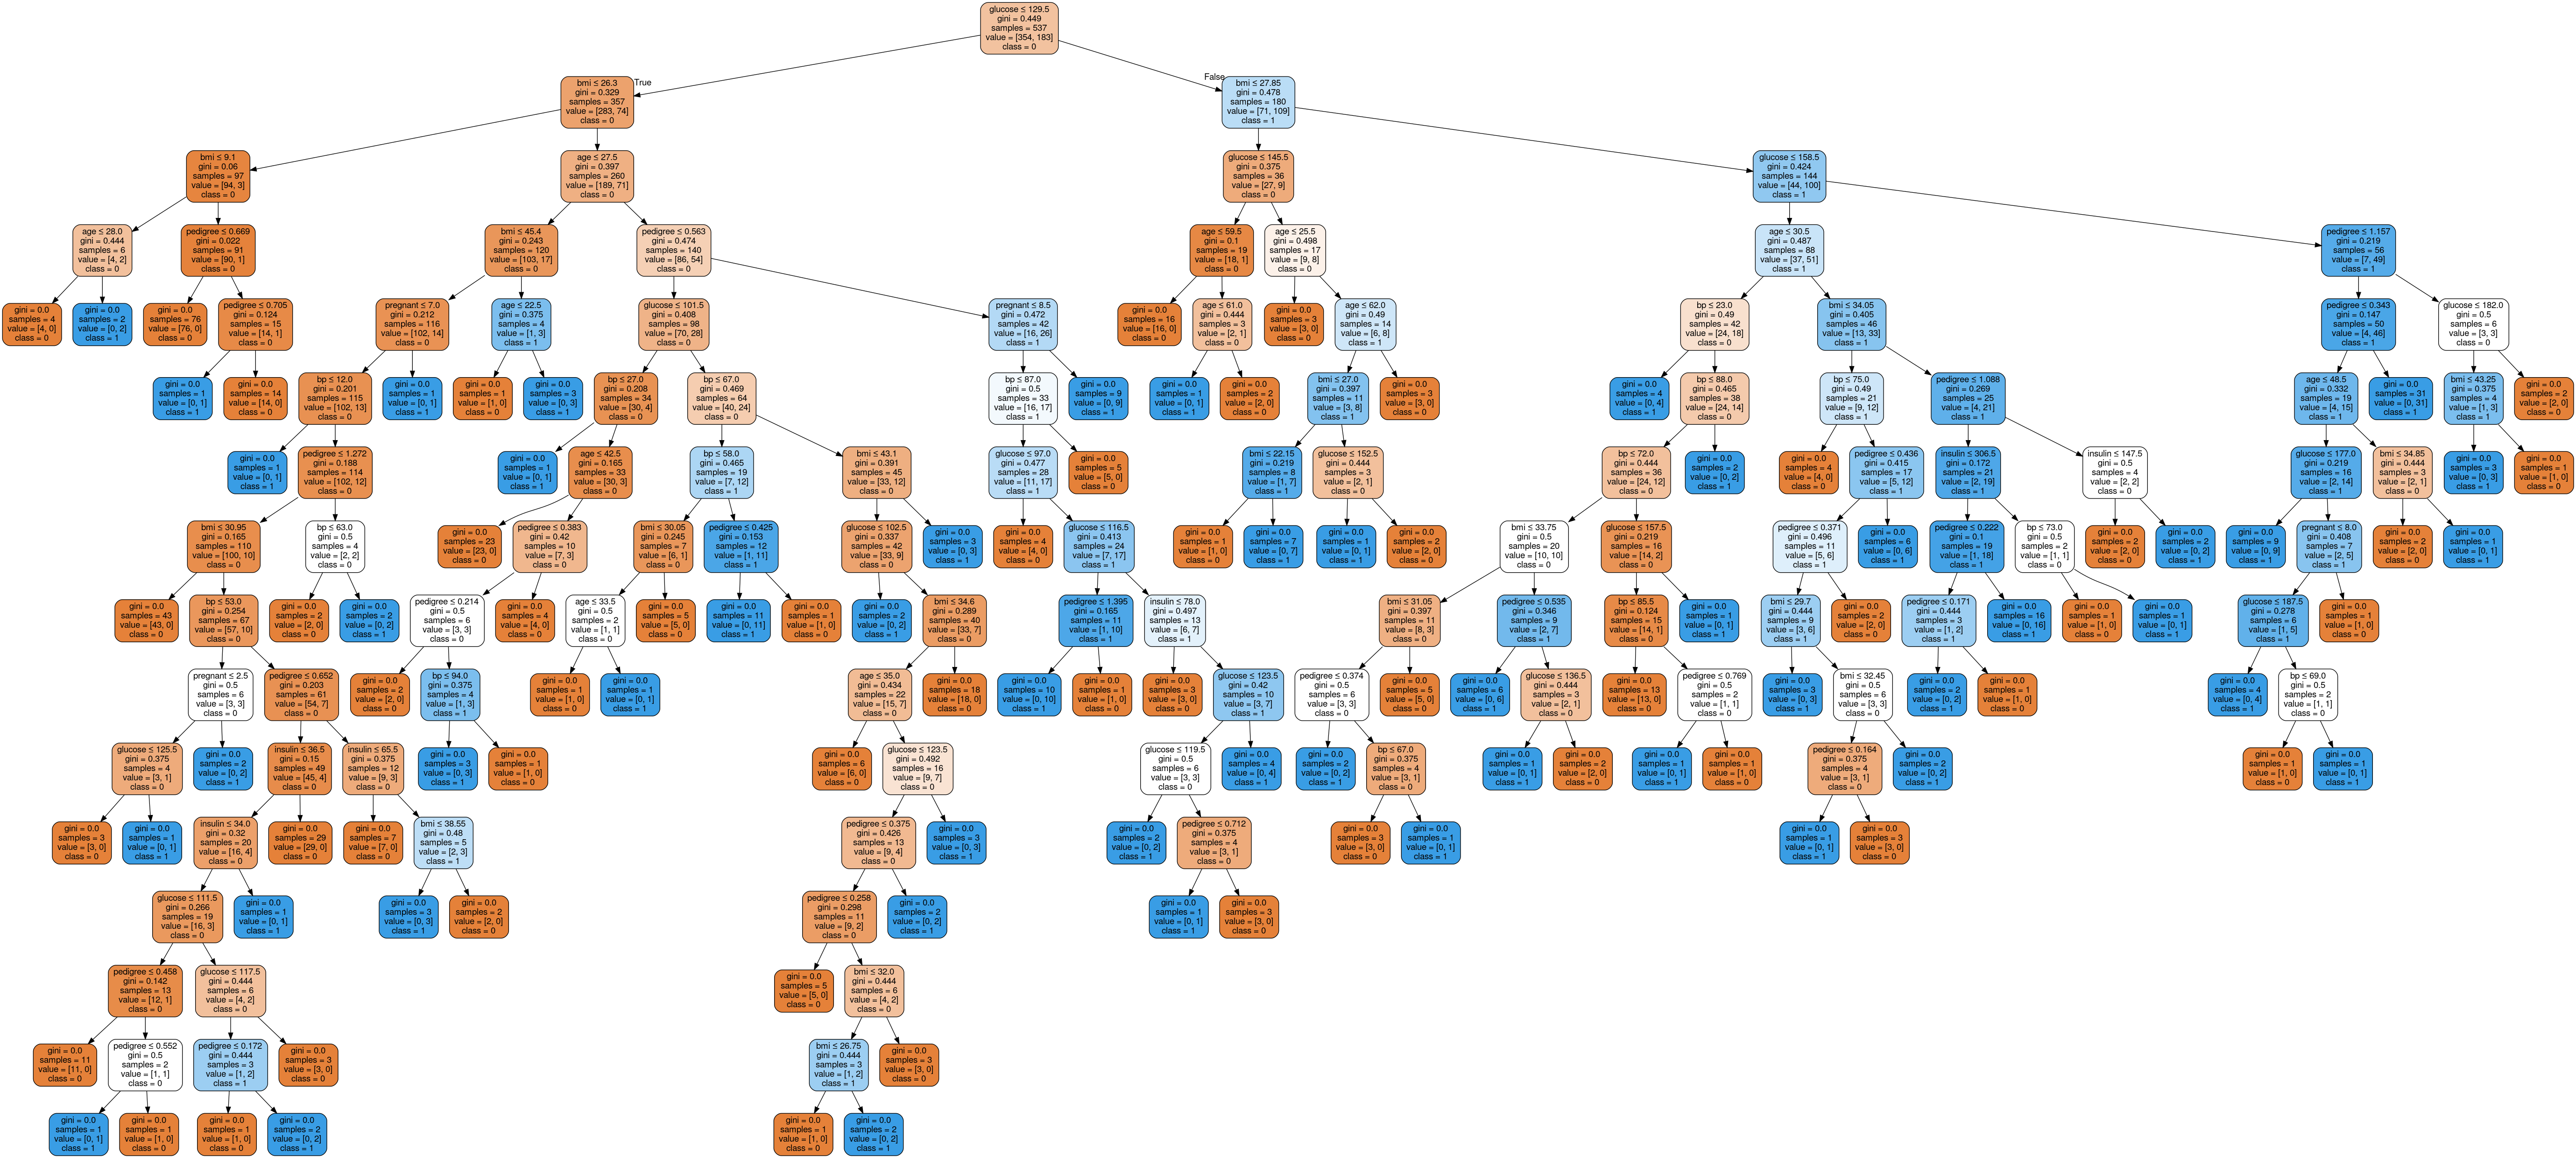

In [16]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('figures/diabetes.png')
Image(graph.create_png())

The resulting tree is frequently too complex, over-fitting the data.Therefore, grow the full tree, then prune it back to get a subtree. Use cost complexity pruning: groups of subtrees with tuning parameter ($\alpha$).
$\alpha$ controls trade-offbetween and training datafit. With classification we can no longer split with RSS (requires Gini coef. or entropy):

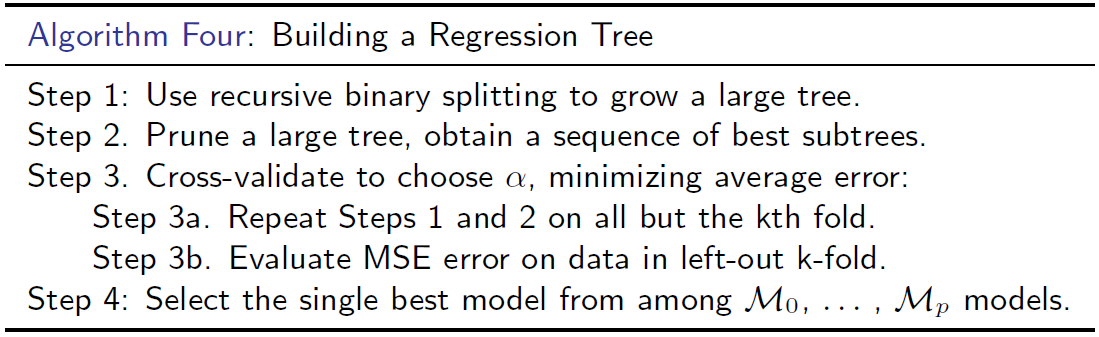

In [17]:
Image(filename='figures/algorithm_4.png')



**Good**: Trees are very easy to explain, and can be displayed graphically.

**Bad**: generally poor performance, and sensitive to changes in data.

#### 4.1.6.6 Bagging

Bootstrap aggregation (otherwise known as 'bagging') reduces the extremely high variance of decision trees. The genearl idea is to build multiple models with re-sampled data, and average the resulting predictions. With $B$ different bootstrapped training sets, we train our method on each $b$ (resample) to get $\hat{f}^b(x)$, then take the average outcome:

$$ \hat{f}_{bag} (x) = \frac{1}{B}\sum_{b=1}^B \hat{f}^b(x)$$

These trees are grown deep, and are not pruned. Averaging these $B$ trees substantially reduces the variance associated with any one individual decision tree. In the classification realm, the decision function can be a majority vote. The number of trees $B$ is not a critical parameter with bagging. We lose interpretability with bagging, but can still analyze the importance of a predictor through the amount by which the error is decreased due to splits over it (e.g. something like 'Variable Importance Factors'). This naturally leads us towards Random Forests; What do we call a group of trees?

#### 4.1.6.7 Random Forests

Random Forests improve on bagging by de-correlating the trees. As before, build a number of trees on bootstrapped training samples ('bagging', as described above). Each time we split the data into training resamples, we use a random sample of m predictors as split candidates. Then, we only use one of them where m $\approx$ $\sqrt{p}$. Random forests are so popular because performance is increased by removing the correlated bias between the predictors. That is to say, that a random forest will be helpful when we have multiple correlated predictors. On average, $(p - m)$/$p$ of the splits will not even consider the strong predictor.

Can you think of when a random forest is essentially the same as `Bagging? Thats right! If a random forest is built using m = p, then this is tantamount to bagging. Don't worry, we'll see example applications of all these things later in the lecture.

#### 4.1.6.7 Boosting

Bagging can be applied to many different types of statistical learning methods. Similar to bagging, we have 'boosting'. Like bagging, boosting can be applied to many statistical learning methods. Boosting grows trees sequentially using information from previous trees. Unlike a single tree (which potentially over-fits), boosting instead learns slowly. Given the current model, we fit a decision tree to the residuals from the model; this is the essence of boosting -- that we are modelling the residuals of the best previous model. The shrinkage parametre ($\lambda$) slows the process down, allowing more shape to the trees.

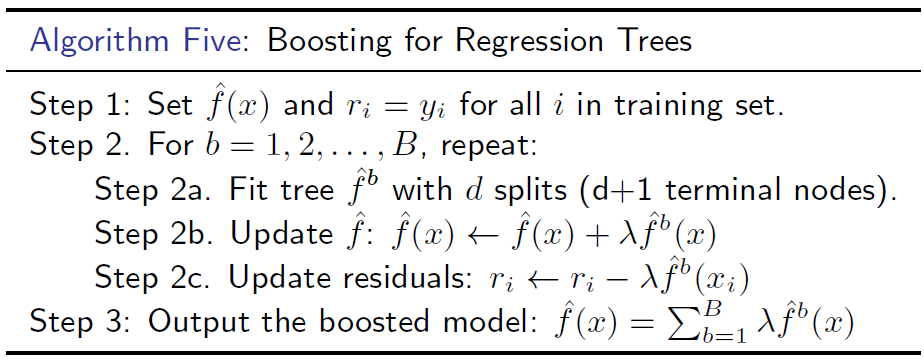

In [18]:
Image(filename='figures/algorithm_5.png')

### 4.3.3 An introduction to support vector machines (SVM).

SVMs have grown substantially in popularity since the 1990s, and generally perform well across a variety of settings. The SVM is a generalization of a simple and intuitive maximal margin classifier. Maximal margin classifiers require the classes be separable by a linear boundary. They are based on the concepts of separating hyper-planes, which we can see in the figure below. In a $p$-dimensional space, a hyper-plane is a at flat affine subspace of dimension $p-1$. For example, in two dimensions, a hyper-plane is defined by the equation:

$$\beta_0 + \beta_1X_1 + \beta_2X_2 = 0$$

A natural choice is the maximal margin hyper-plane: separating hyper-plane where margin is largest (farthest minimum distance to training observations). This margin represents the mid-line of the widest "slab" that we can insert. The generalization of the maximal margin classifier to the non-separable case using soft margins is known as the support vector classifier, which generally performs better in many empirical contexts.

Lets consider the figure below, in the process formally introducing Hyper-planes, Margins and Support Vectors.

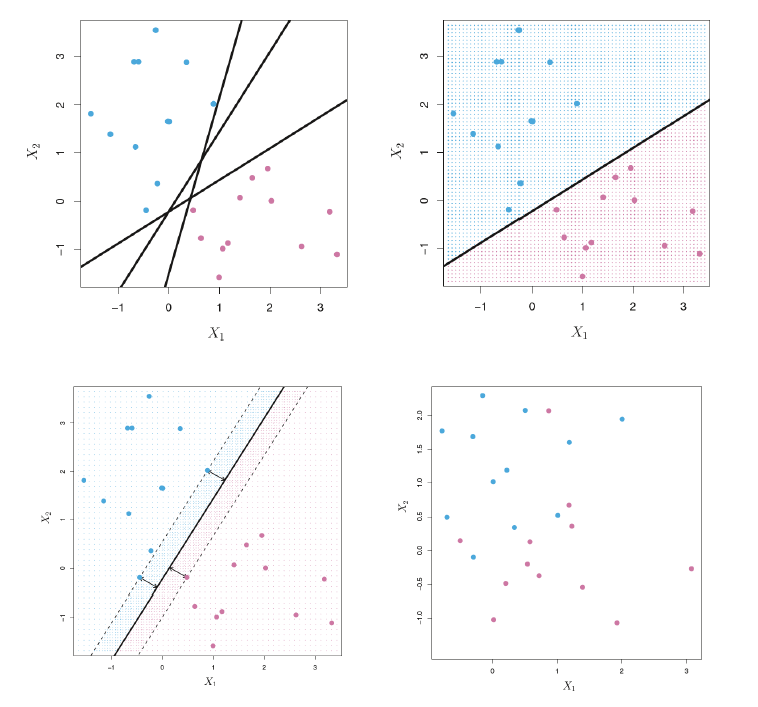

In [19]:
Image(filename='figures/svms.png')

    1. Top left subfigure shows that multiple hyper-planes can exist for one separable boundary
    2. Top right subfigure shows how one of these separating hyperplanes would classify.
    3. Bottom left shows the support vectors which maximize the distance and the maximal margin classifier.
    4. Bottom right shows the non-separable case which requires soft margins.

Lets take what we've learnt directly above and use this information to move towards Support Vector Classifiers.

What about if there is no obvious linear boundary? Consider a classifier based on a hyper-plane that doesn't perfectly separate two classes: could we mis-classify a few observations to better classify the rest? The support vector classifier (a 'soft' margin classifier) does exactly this. The margin is soft because it can be violated by some training observations, allowing flexibility -- a tradeoff to improve predictive accuracy. When there is no separating 'hard' margin hyper-plane, such a situation is inevitable, as is the case with most empirical examples.

So-called `slack variables' within the maximization problem allow individual observations to be on the wrong side of the margin. Note: we still seek to make the margin as wide as possible. Observations which don't violate the margin don't affect the classifier. Changing the position of that observation would not change the classifer at all, _as long as it remains on the correct side of the margin_.

This is the basis of Support Vector Machines. Above, we described and looked at situations where the decision boundaries -- which may or may include observations on the wrong side of the margin -- were linear. Moving to a support vector machine allows nonlinear decision boundaries. This is done by combining a support vector classifier with a non-linear kernel. A kernel is a weighting function used in non-parametric estimation techniques. This is easily extended to multiple classes with 'one-verses-one' and 'one-verses-all' classification. Lets see two examples of support vector machines in action:

The first is a polynominal kernel (d=3), and the second is a radial kernel:

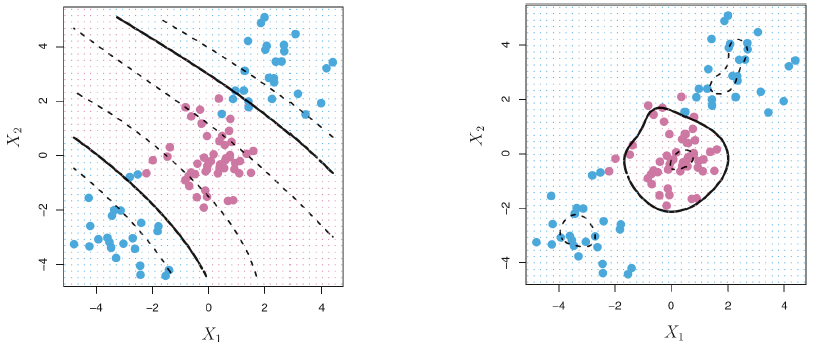

In [20]:
Image(filename='figures/svm_fig7.png')

### 4.4. Concluding thoughts, and things we didn't cover

#### 4.4.1. ML Pipeline

The machine learning pipeline and how to approach your own problems:
    1. Obtain data-sets.
    2. Wrangle data into the right shape.
    3. Engineer features.
    4. Define an array of algorithms and specifications.
    5. Estimate and cross-validate.
    6. Evaluate the performance, implement into practice as required.

#### 4.4.2. Things we didnt cover

Things we didn’t cover, which a longer class would have done:

1. We didn’t really talk about grid searches across parameter/specification space.
2. We didn’t begin to discuss deep learning models.
3. We didn’t begin to talk about big data architectures/infrastructures.
4. We didnt even talk about probability outputs with binary outcome models.

### 4.5. Homework for the weekend (slightly longer): An example of binary (supervised) classification (whether a person survives the titanic).

We've covered a lot today! Lets end with a slightly more advanced homework, which is slightly longer, and is _extremely_ similar to the main assignment for the module.

It might be -- conditional on time -- that this becomes the homework question for this week. If there is enough time for students to both do this exercise, and the homework, then so much the better! Solutions provided for both. In this exercise we're interested in predicting whether somebody survives the tragic [Sinking of the Titanic](https://en.wikipedia.org/wiki/Sinking_of_the_Titanic) disaster. The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships. One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

The variables in the dataset are as follows:

* pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* survived: Survival (0 = No; 1 = Yes)
* sex: Sex
* age: Age
* sibsp: Number of siblings/spouses aboard
* parch: Number of parents/children aboard
* fare: Passenger fare (British pound)
* embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
* adult_male: A male 18 or older (0 = No, 1=Yes)
* deck: Deck of the ship
* who: man (18+), woman (18+), child (<18)
* alive: Yes, no
* embarked_town: Port of embarkation (Cherbourg, Queenstown, Southampton)
* class: Passenger class (1st; 2nd; 3rd)
* alone: 1= alone, 0= not alone ( you have at least 1 sibling, spouse, parent or child on board)

Here are the steps for this homework question:

1.  Load in the titanic dataset from seaborn using something like `titanic = sns.load_dataset("titanic")` or otherwise.
2.  Eyeball it with the `head` command.
3.  Then -- as always -- make some exploratory data visualisations (EDA) of your choosing to get a feel for the data.
4.  Based on your EDA, feature engineer _something_. Age might be a good idea, or sex.
5.  Similar to the Boston Housing dataset, set up a KFold split. I'd suggest using a Stratified KFold split for an example like this, as per `from sklearn.model_selection import StratifiedKFold`.
6. Set up something like 25 splits, or more if you want. Question: What's the maximum number of splits\folds which we can run here?
7.  Build logisticregressions, random forests, and support vector classifiers, using things like `from sklearn.model_selection import StratifiedKFold`, `from sklearn.linear_model import LogisticRegression` and `from sklearn.ensemble import RandomForestClassifier`.
8.  Evaluate your models.
